## Jason Brown and Cole Morley
# Analysis of Amazon Co-Purchasing Meta Data

In [57]:
import pandas as pd
import numpy as np
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib.pyplot import subplots
%matplotlib inline
import collections
from bokeh.io import show, output_file
from bokeh.plotting import figure
import seaborn as sns

In [58]:
# read csv file and print format
df = pd.DataFrame(pd.read_csv('products.csv'))
df.head(10)

id                                              title  group  salesrank  \
0   1            Patterns of Preaching: A Sermon Sampler   Book   396585.0   
1   2                         Candlemas: Feast of Flames   Book   168596.0   
2   3   World War II Allied Fighter Planes Trading Cards   Book  1270652.0   
3   4  Life Application Bible Commentary: 1 and 2 Tim...   Book   631289.0   
4   5    Prayers That Avail Much for Business: Executive   Book   455160.0   
5   6  How the Other Half Lives: Studies Among the Te...   Book   188784.0   
6   7                                              Batik  Music     5392.0   
7   8                                Losing Matt Shepard   Book   277409.0   
8   9  Making Bread: The Taste of Traditional Home-Ba...   Book   949166.0   
9  10                             The Edward Said Reader   Book   220379.0   

   review_cnt  downloads  rating  
0           2          2     5.0  
1          12         12     4.5  
2           1          1     5.0  
3           1          1     4.0  
4           0          0     0.0  
5          17         17     4.0  
6           3          3     4.5  
7          15         15     4.5  
8           0          0     0.0  
9           6          6     4.0

In [59]:
salesrank_filter = df[(df['group']=='Book')&((df['salesrank']<=150000)&(df['salesrank']>-1))]
copurchase_df = pd.DataFrame(pd.read_csv('copurchase.csv'))
df_filter=df[(df['group']=='Book')&((df['salesrank']<=150000)&(df['salesrank']>-1))]
copurchase_df=pd.DataFrame(pd.read_csv('copurchase.csv'))
copurchase_df_book=copurchase_df[copurchase_df.Source.isin(df_filter.id) & copurchase_df.Target.isin(df_filter.id)]
in_degree=copurchase_df_book.groupby(['Target'])['Source'].size().reset_index(name='in_degree')
out_degree=copurchase_df_book.groupby(['Source'])['Target'].size().reset_index(name='out_degree')

x = out_degree.set_index('Source')
y = in_degree.set_index('Target').rename_axis('Source')
y.columns = x.columns

combined=y.add(x, fill_value=0).loc[y.index, :].reset_index()
df_filter.head()
combined.nlargest(5,'out_degree')


Source  out_degree
1        33        53.0
360    4429        53.0
23      244        36.0
32      302        22.0
471    5913        22.0

In [60]:
df_final_group=copurchase_df_book.groupby(['Source','Target']).size().reset_index(name='Freq')
df_final_group.head()

Source  Target  Freq
0      12     261     1
1      74     282     1
2      77     422     1
3      79      82     1
4     117     131     1

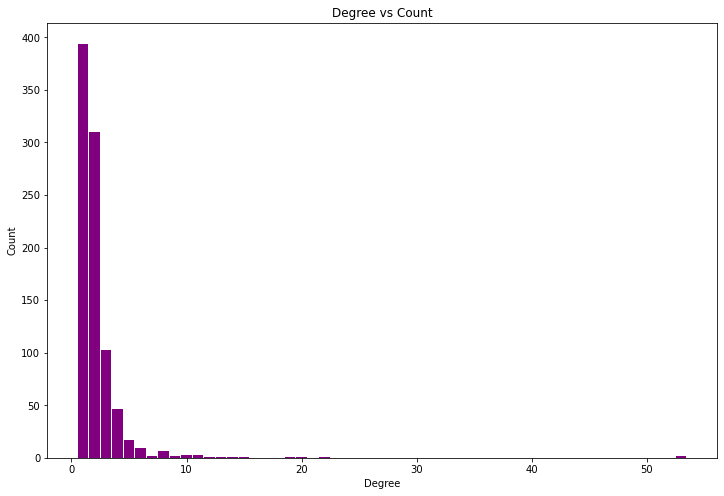

In [61]:
g = nx.from_pandas_edgelist(df_final_group, 'Source', 'Target', ['Freq'])
subnet = nx.node_connected_component(g, 4429)

degree_sequence = sorted([d for n, d in g.subgraph(subnet).degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.9, color='purple')
plt.title("Degree vs Count")
plt.ylabel("Count")
plt.xlabel("Degree")
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Graph Description:
**Degree of Nodes:**<br/> Node Degree is the number of nodes that a parent node is directly connected to, showing the depth of a network.

The above histogram shows the spread of degree in each of the networks nodes. Our histogram above shows that most nodes have a low degree and very few nodes have a high degree.


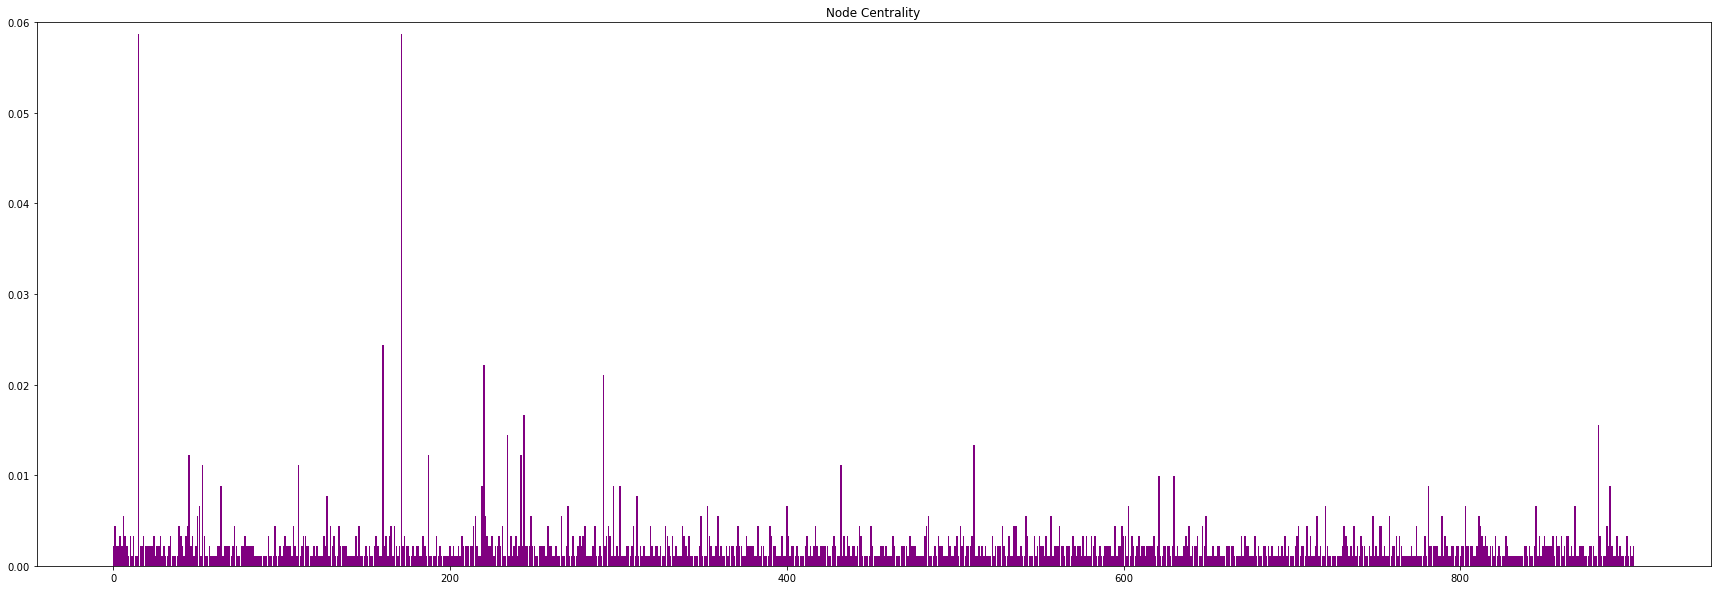

In [62]:
degree_central=nx.degree_centrality(g.subgraph(subnet))
plt.bar(range(len(degree_central)), list(degree_central.values()),width=0.9, color='purple')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(30,10) #change this to change look
axes.set_ylim([0,0.06])
plt.title("Node Centrality")
plt.show()

### Graph Description:
**Node Centrality:**<br/> Node Centrality describes the fraction of nodes within the entire network that each node is connected to. The more central a node is, the closer it is to all other nodes. Centrality can also be used to show the spread of network data.

The above histogram describes the centrality of each node in the network. It can be seen that the node centrality is similar across the entire network. This means that the data and node influence is spread evenly.

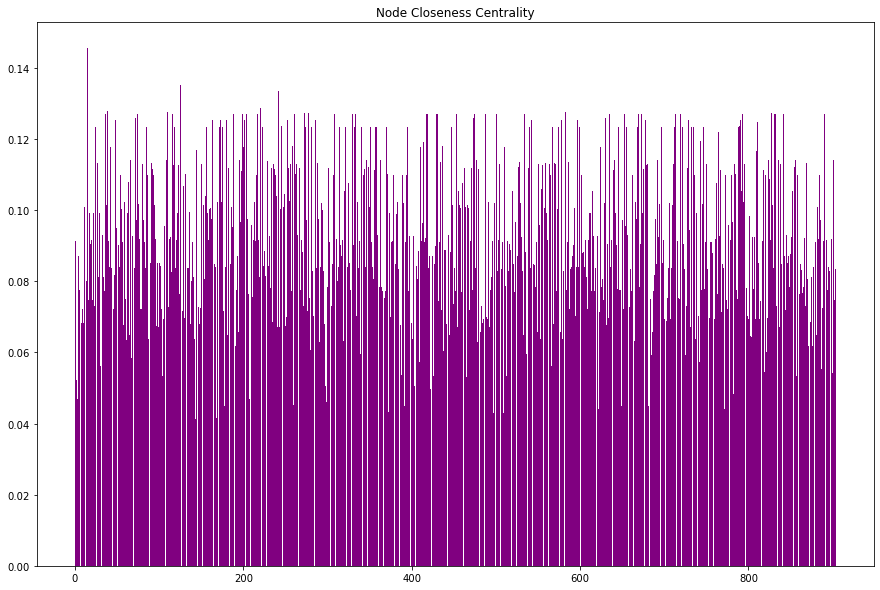

In [63]:
#Closeness Centrality of the Nodes.
close_degree_central=nx.closeness_centrality(g.subgraph(subnet))
plt.bar(range(len(close_degree_central)), list(close_degree_central.values()),width=0.9, color='purple')
# plt.xticks(range(len(degree_central)), list(degree_central.keys()))
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Node Closeness Centrality")
plt.show()

### Graph Description:
**Closeness Centrality:**<br/>Closeness centrality is defined by is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes. 

For this particular subgraph, the closeness centrality looks similar for most of the nodes. This means that the data is evenly distributed and the average shortest path to all other nodes from a particular node is about the same, across the network.

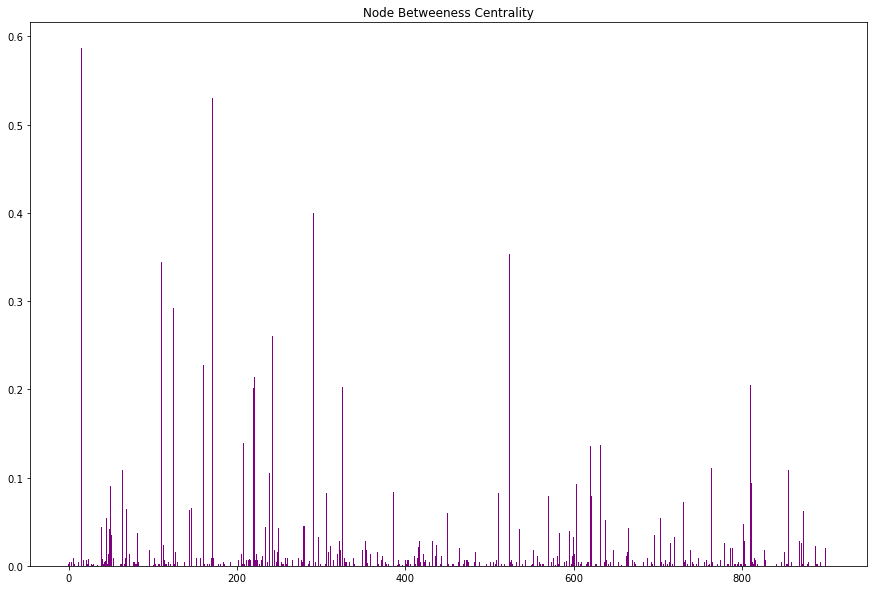

In [64]:
#Between Centrality of the Nodes.
between_degree_central=nx.betweenness_centrality(g.subgraph(subnet))
plt.bar(range(len(between_degree_central)), list(between_degree_central.values()),width=0.9, color='purple')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Node Betweeness Centrality")
plt.show()

### Graph Description:
**Betweenness Centrality:**<br/>
Betweenness centrality searches for the vertex of a graph as it quantifies the number of nodes which are in the path of other nodes. It is a good measure of how connected the data is with eachother. As seen above, it can be seen that most nodes do not act as the bridge for other nodes because the average path length is not large. 

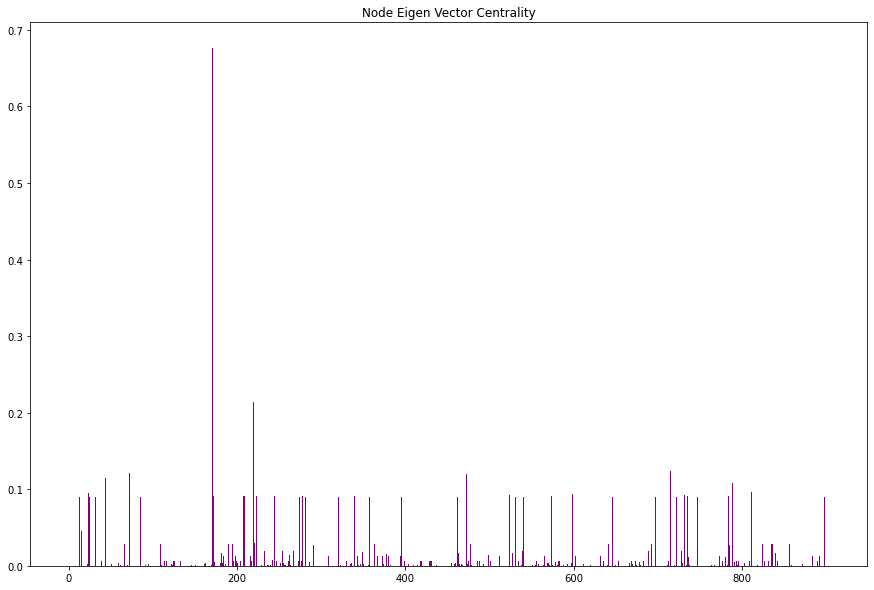

In [65]:
#Eigen Value Centrality of the Nodes.
Eigen_central=nx.eigenvector_centrality_numpy(g.subgraph(subnet))
plt.bar(range(len(Eigen_central)), list(Eigen_central.values()),width=0.9, color='purple')
fig = plt.gcf()
axes=plt.gca()
fig.set_size_inches(15,10)
plt.title("Node Eigen Vector Centrality")
plt.show()

### Graph Description:
**Eigen Vector Centrality:**<br/> Eigenvector centrality calculates the centrality of a given node, dependant on the centrality of its neighboring nodes. 

As seen above, only two nodes have a much higher vecotr score than the others which have a similar value of around 0.1.

In [66]:
# Diameter of the network graph
nx.diameter(g.subgraph(subnet))

41

#### Diameter of Network: 41
The shortest path between the two most distant nodes in a network. AKA the longest path.

In [67]:
filter_4429=df_final_group[(df_final_group['Source']==4429)|(df_final_group['Target']==4429)]
merged=pd.merge(filter_4429,df_filter,how='left', left_on=['Source'],right_on=['id'])
merged.loc[merged.id==4429,'title']='The Narcissistic Family : Diagnosis and Treatment'
merged.loc[merged.id==4429,'salesrank']=9727
merged.loc[merged.id==4429,'review_cnt']=19
merged.loc[merged.id==4429,'downloads']=19
merged.loc[merged.id==4429,'rating']=5.0
merged.loc[merged.id==4429,'id']=2501
merged[['rating','salesrank','review_cnt']].mean()

rating            3.632075
salesrank     75080.471698
review_cnt       22.037736
dtype: float64

In [68]:
h=g.subgraph(subnet)
edges=pd.DataFrame(list(h.edges()))
edges=edges.rename(columns={'0':'Source','1':'Target'})

#total salesrank
df_cop_sales=pd.merge(edges,df_filter[['id','salesrank']],left_on=1,right_on='id',how='left')
df_cop_sales=df_cop_sales.rename(columns={'salesrank':'salesrank_target'})

df_cop_sale=pd.merge(edges,df_filter[['id','salesrank']],left_on=0,right_on='id',how='left')
df_cop_sale=df_cop_sale.rename(columns={'salesrank':'salesrank_source'})

df_cop_sale['salesrank_target']=df_cop_sales['salesrank_target']
df_source_sum=df_cop_sale.groupby(0)['salesrank_target'].sum().reset_index(name='Source_sum')
df_target_sum=df_cop_sale.groupby(1)['salesrank_source'].sum().reset_index(name='Target_sum')

x = df_source_sum.set_index(0)
y = df_target_sum.set_index(1).rename_axis(0)
y.columns = x.columns

combined=y.add(x, fill_value=0)
combined=pd.DataFrame(combined)
combined=combined.rename(columns={'0':'id','Source_sum':'Total_salesrank'})
combined.head()

Total_salesrank
0                   
33         4354123.0
77          125232.0
78          804969.0
130         159895.0
148          60293.0

In [69]:
#Total rating
df_cop_rating=pd.merge(edges,df_filter[['id','rating']],left_on=1,right_on='id',how='left')
df_cop_rating=df_cop_rating.rename(columns={'rating':'rating_target'})

df_cop_rate=pd.merge(edges,df_filter[['id','rating']],left_on=0,right_on='id',how='left')
df_cop_rate=df_cop_rate.rename(columns={'rating':'rating_source'})
df_cop_rate['rating_target']=df_cop_rating['rating_target']

df_source_rate_sum=df_cop_rate.groupby(0)['rating_target'].sum().reset_index(name='Source_sum')
df_target_rate_sum=df_cop_rate.groupby(1)['rating_source'].sum().reset_index(name='Target_sum')

x = df_source_rate_sum.set_index(0)
y = df_target_rate_sum.set_index(1).rename_axis(0)
y.columns = x.columns

combined_rating=y.add(x, fill_value=0)
combined_rating=pd.DataFrame(combined_rating)
combined_rating=combined_rating.rename(columns={'0':'id','Source_sum':'Total_rating'})
combined_rating.head()

Total_rating
0                
33          217.5
77           14.0
78           49.5
130           9.0
148           4.5

In [70]:
df_cop_reviews=pd.merge(edges,df_filter[['id','review_cnt']],left_on=1,right_on='id',how='left')
df_cop_reviews=df_cop_reviews.rename(columns={'review_cnt':'review_cnt_target'})

df_cop_review=pd.merge(edges,df_filter[['id','review_cnt']],left_on=0,right_on='id',how='left')
df_cop_review=df_cop_review.rename(columns={'review_cnt':'review_cnt_source'})
df_cop_review['review_cnt_target']=df_cop_reviews['review_cnt_target']

df_source_review_sum=df_cop_review.groupby(0)['review_cnt_target'].sum().reset_index(name='Source_sum')
df_source_reviews_sum=df_cop_review.groupby(1)['review_cnt_source'].sum().reset_index(name='Target_sum')

x = df_source_review_sum.set_index(0)
y = df_source_reviews_sum.set_index(1).rename_axis(0)
y.columns = x.columns

combined_reviews=y.add(x, fill_value=0)
combined_reviews=pd.DataFrame(combined_reviews)
combined_reviews=combined_reviews.rename(columns={'0':'id','Source_sum':'Total_review_cnt'})
combined_reviews.head()

Total_review_cnt
0                    
33             1117.0
77               12.0
78             1736.0
130               9.0
148              14.0

#### Average salesrank, rating and review count: 
By finding out the degree for each node, we can find the average salesrank, rating and review count for each product.

In [71]:
degrees=pd.DataFrame(list(h.degree()))
degrees=degrees.sort_values(0)
degrees.head()

0   1
15   33  53
47   77   3
45   78  11
73  130   2
83  148   2

In [72]:
df_merge_sales=pd.merge(combined,degrees,left_on=0,right_on=0,how='left')
df_merge_sales['Average_Salesrank']=df_merge_sales['Total_salesrank']/df_merge_sales[1]
df_merge_sales=df_merge_sales.rename(columns={'key_0':'id',1:'Degree'})
df_merge_sales.head()

id  Total_salesrank  Degree  Average_Salesrank
0   33        4354123.0      53       82153.264151
1   77         125232.0       3       41744.000000
2   78         804969.0      11       73179.000000
3  130         159895.0       2       79947.500000
4  148          60293.0       2       30146.500000

In [73]:
df_merge_rating=pd.merge(combined_rating,degrees,left_on=0,right_on=0,how='left')
df_merge_rating['Average_Rating']=df_merge_rating['Total_rating']/df_merge_rating[1]
df_merge_rating=df_merge_rating.rename(columns={'key_0':'id',1:'Degree'})
df_merge_rating.head()

id  Total_rating  Degree  Average_Rating
0   33         217.5      53        4.103774
1   77          14.0       3        4.666667
2   78          49.5      11        4.500000
3  130           9.0       2        4.500000
4  148           4.5       2        2.250000

In [74]:
df_merge_reviews=pd.merge(combined_reviews,degrees,left_on=0,right_on=0,how='left')
df_merge_reviews['Average_Reviews']=df_merge_reviews['Total_review_cnt']/df_merge_reviews[1]
df_merge_reviews=df_merge_reviews.rename(columns={'key_0':'id',1:'Degree'})
df_merge_reviews.head()

id  Total_review_cnt  Degree  Average_Reviews
0   33            1117.0      53        21.075472
1   77              12.0       3         4.000000
2   78            1736.0      11       157.818182
3  130               9.0       2         4.500000
4  148              14.0       2         7.000000

In [75]:
centrality_df=pd.DataFrame(degree_central.items(),columns=['id','centrality'])
degree_df=pd.DataFrame(degrees.items(),columns=['id','degree'])
closeness_central_df=pd.DataFrame(close_degree_central.items(),columns=['id','closeness_centrality'])
between_degree_df=pd.DataFrame(between_degree_central.items(),columns=['id','between_centrality'])
Eigen_central_df=pd.DataFrame(Eigen_central.items(),columns=['id','eigen_centrality'])
centrality_df.head()
#filter purchase dataset

id  centrality
0   24578    0.002215
1    4099    0.004430
2  141316    0.002215
3  184324    0.002215
4    2057    0.003322

In [76]:
# df_filter_books=df_filter[(df_filter.id.isin(centrality_df.id)) & (df_filter.id.isin(degree_df.id))
#                           &(df_filter.id.isin(between_degree_df.id))&(df_filter.id.isin(Eigen_central_df.id))]
# df_filter_books.head()
# df_filter_books=pd.merge(df_filter_books,centrality_df,left_on='id',right_on='id',how='left')
# df_filter_books=pd.merge(df_filter_books,degree_df,left_on='id',right_on='id',how='left')
# df_filter_books=pd.merge(df_filter_books,closeness_central_df,left_on='id',right_on='id',how='left')
# df_filter_books=pd.merge(df_filter_books,between_degree_df,left_on='id',right_on='id',how='left')
# df_filter_books=pd.merge(df_filter_books,Eigen_central_df,left_on='id',right_on='id',how='left')

# df_filter_books=pd.merge(df_filter_books,df_merge_sales[['key_0','Average_Salesrank']],left_on='id',right_on='key_0',how='left')
# df_filter_books=pd.merge(df_filter_books,df_merge_rating[['key_0','Average_Rating']],left_on='id',right_on='key_0',how='left')
# df_filter_books=pd.merge(df_filter_books,df_merge_reviews[['key_0','Average_Reviews']],left_on='id',right_on='key_0',how='left')
# df_filter_books=df_filter_books.drop('key_0_x',1)
# df_filter_books=df_filter_books.drop('key_0_y',1)
# df_filter_books=df_filter_books.drop('key_0',1)
# df_filter_books.head()

In [77]:
trimmed = df[["salesrank","review_cnt","downloads","rating"]]
print("\n*********************** All Data ***********************")
corr = trimmed.corr()
corr.style.background_gradient(cmap = 'coolwarm')



*********************** All Data ***********************


In [78]:
print("\n****************************** BOOKS *****************************")
books = df[(df['group']=='Book')]
corr = books.corr()
corr.style.background_gradient(cmap = 'coolwarm')


****************************** BOOKS *****************************


In [79]:
print("\n****************************** DVDs *****************************")
dvds = df[(df['group']=='DVD')]
corr = dvds.corr()
corr.style.background_gradient(cmap = 'coolwarm')


****************************** DVDs *****************************


In [80]:
print("\n****************************** VIDEOS *****************************")
videos = df[(df['group']=='Video')]
corr = videos.corr()
corr.style.background_gradient(cmap = 'coolwarm')


****************************** VIDEOS *****************************


In [81]:
print("\n******************************* MUSIC ******************************")
music = df[(df['group']=='Music')]
corr = videos.corr()
corr.style.background_gradient(cmap = 'coolwarm')


******************************* MUSIC ******************************


Correlation between all different relevant variables, can turn into a scatterplot and analyze in presentation

**Scatter of number of reviewws to downloads using agglomerative cluster. Probably avoid using this one because it is pretty pointless**

Analysis Time = 0.43885374069213867 seconds


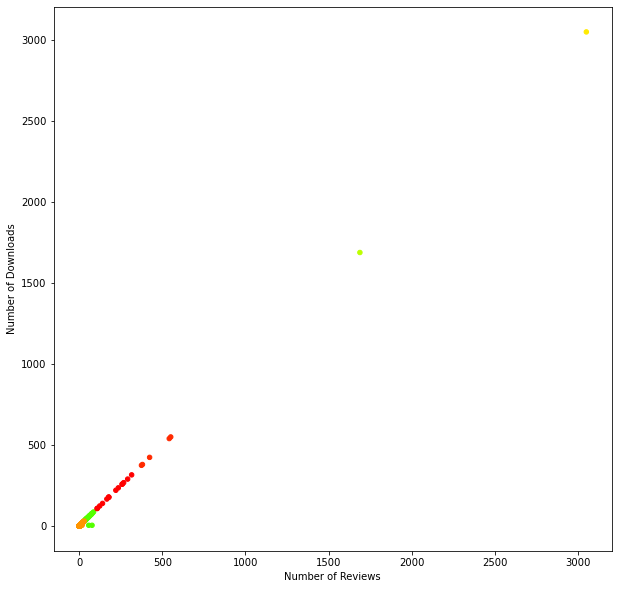

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
import time
from sklearn.neighbors import kneighbors_graph


#Temporatily use first 1000 so computer stops catching on fire
book_data = books[['review_cnt','downloads']].head(1000)
#X_train, X_test, y_train, y_test = train_test_split(book_data, book_ranks, test_size = .15, random_state = 42)
# k neighbors, naive bayes, agglomerative (bottom up)
#RATING SALESSRANK DOWNLOADS, MIX AND MATCH 2D + 3D

connectivity = kneighbors_graph(book_data, n_neighbors=10, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(book_data)

finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Review count
x = book_data.iloc[:,0]
# Downloads
y = book_data.iloc[:,1]
x = np.array(x)
y = np.array(y)

cluster = np.array(model.labels_)

ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Number of Downloads')
ax.scatter(x,y, c=cluster, s =20, cmap = plt.cm.prism)
plt.show()

**BOOKS: Downloads to sales rank using agglomerative, kneighbors graph for connectivity map**

Analysis Time = 0.08235406875610352 seconds


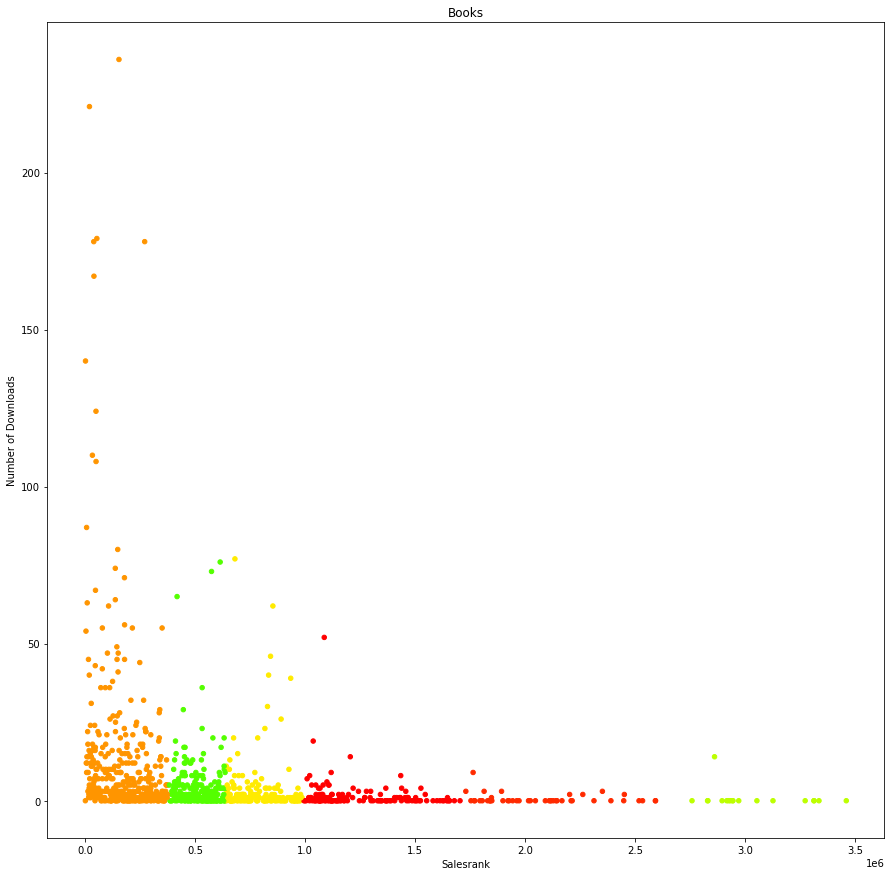

In [83]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

book_data = books[['salesrank','downloads']].head(1000)
book_data = book_data[~(np.abs(book_data.downloads-book_data.downloads.mean()) > (2*book_data.downloads.std()))]

connectivity = kneighbors_graph(book_data, n_neighbors=10, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(book_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = book_data.iloc[:,0]
# Downloads
y = book_data.iloc[:,1]
x = np.array(x)
y = np.array(y)


cluster = np.array(model.labels_)

plt.title("Books")
ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.scatter(x,y, c=cluster, s =20, cmap = plt.cm.prism)
plt.show()

**DVDS: Downloads to sales rank using agglomerative, kneighbors graph for connectivity map**

Analysis Time = 0.07306504249572754 seconds


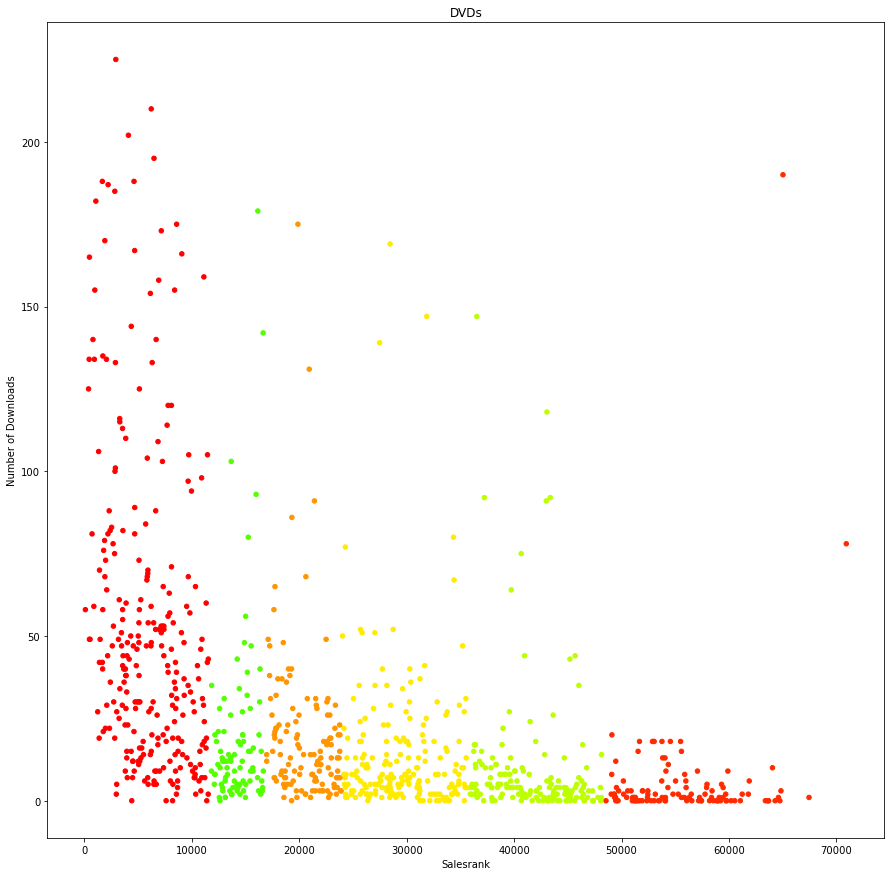

In [84]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

dvd_data = dvds[['salesrank','downloads']].head(1000)
dvd_data = dvd_data[~(np.abs(dvd_data.downloads-dvd_data.downloads.mean()) > (2*dvd_data.downloads.std()))]

connectivity = kneighbors_graph(dvd_data, n_neighbors=10, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(dvd_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = dvd_data.iloc[:,0]
# Downloads
y = dvd_data.iloc[:,1]
x = np.array(x)
y = np.array(y)


cluster = np.array(model.labels_)

plt.title("DVDs")
ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.scatter(x,y, c=cluster, s =20, cmap = plt.cm.prism)
plt.show()

**Music: Downloads to sales rank using agglomerative, kneighbors graph for connectivity map**

Analysis Time = 0.08613991737365723 seconds


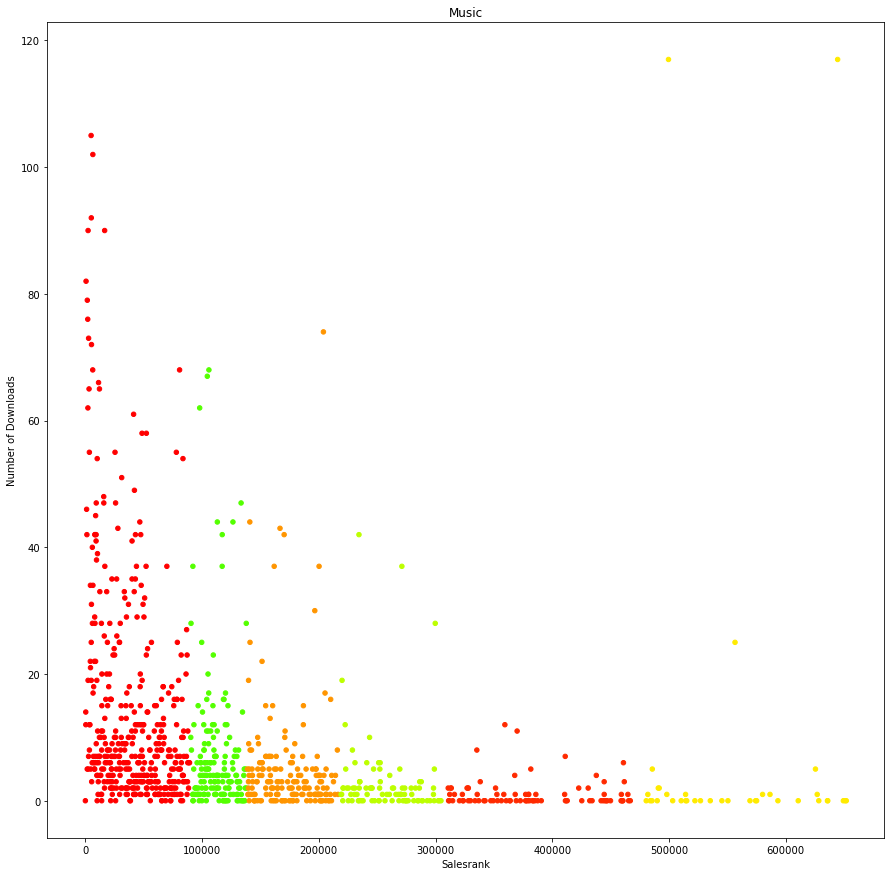

In [85]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

music_data = music[['salesrank','downloads']].head(1000)
music_data = music_data[~(np.abs(music_data.downloads-music_data.downloads.mean()) > (2*music_data.downloads.std()))]

connectivity = kneighbors_graph(music_data, n_neighbors=10, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(music_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = music_data.iloc[:,0]
# Downloads
y = music_data.iloc[:,1]
x = np.array(x)
y = np.array(y)


cluster = np.array(model.labels_)

plt.title("Music")
ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.scatter(x,y, c=cluster, s =20, cmap = plt.cm.prism)
plt.show()

**Videos: Downloads to sales rank using agglomerative, kneighbors graph for connectivity map**

Analysis Time = 0.14608478546142578 seconds


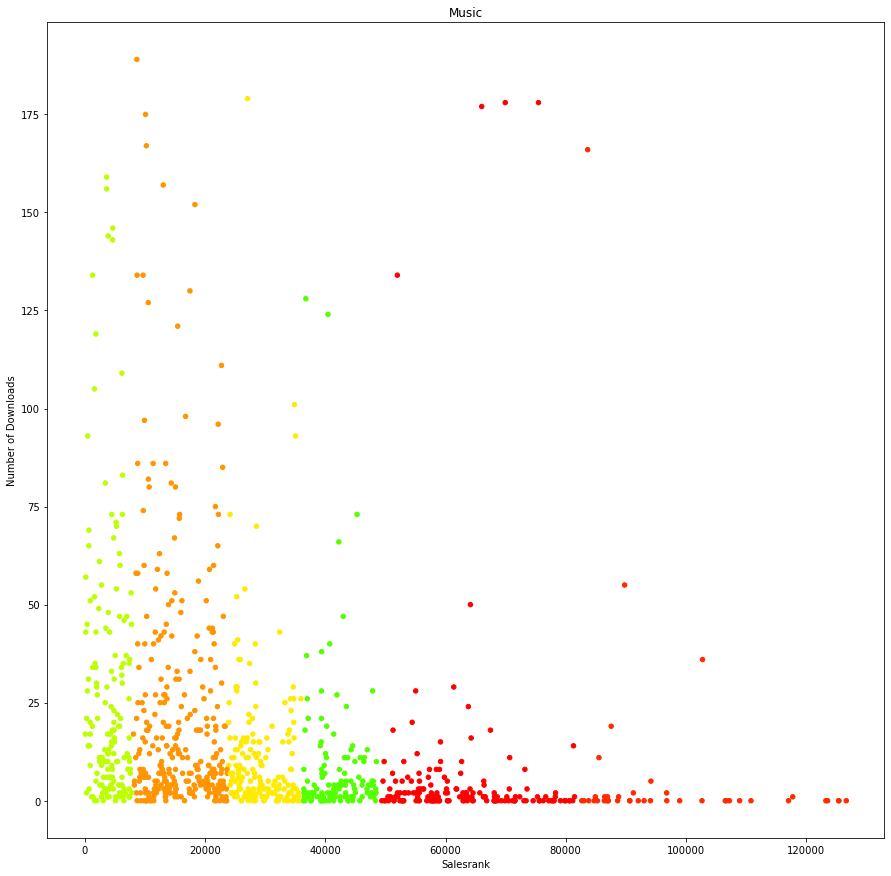

In [86]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

videos_data = videos[['salesrank','downloads']].head(1000)
videos_data = videos_data[~(np.abs(videos_data.downloads-videos_data.downloads.mean()) > (2*videos_data.downloads.std()))]

connectivity = kneighbors_graph(videos_data, n_neighbors=10, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(videos_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = videos_data.iloc[:,0]
# Downloads
y = videos_data.iloc[:,1]
x = np.array(x)
y = np.array(y)


cluster = np.array(model.labels_)

plt.title("Music")
ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.scatter(x,y, c=cluster, s =20, cmap = plt.cm.prism)
plt.show()

**BOOKS: Downloads, salesrank and ratings in 3d plot using same agglomerative parameters**

Analysis Time = 0.2985069751739502 seconds


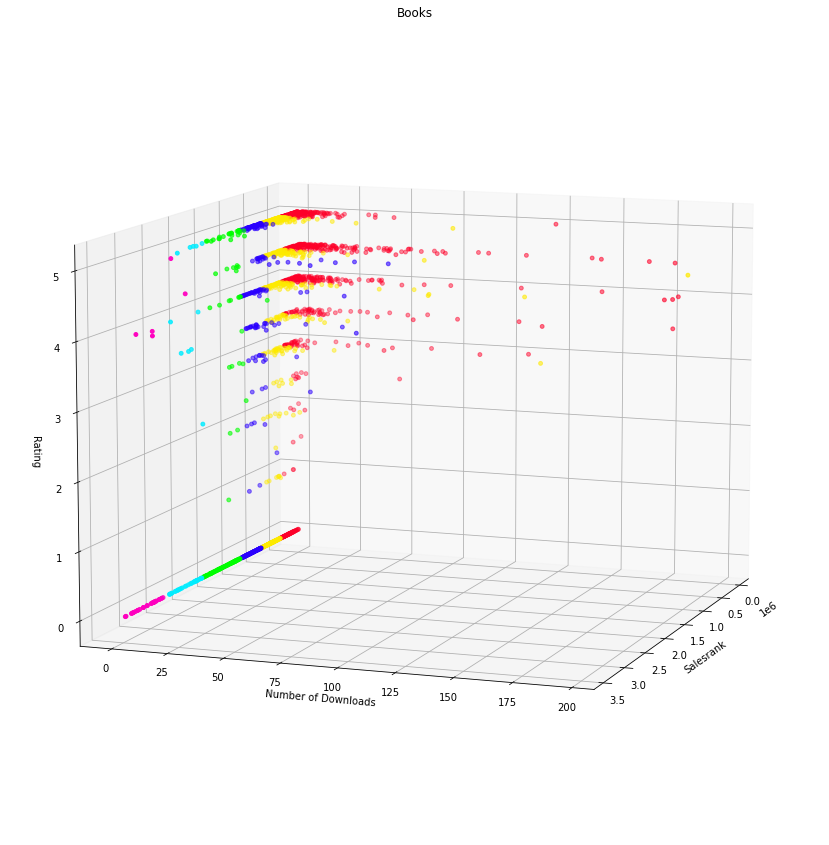

In [87]:


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

book_data = books[['salesrank','downloads','rating']].head(2000)
book_data = book_data[~(np.abs(book_data.downloads-book_data.downloads.mean()) > (2*book_data.downloads.std()))]

connectivity = kneighbors_graph(book_data, n_neighbors=5, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(book_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = book_data.iloc[:,0]
# Downloads
y = book_data.iloc[:,1]
#rating
z = book_data.iloc[:,2]
x = np.array(x)
y = np.array(y)
z = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=20)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("Books")
plt.show()

**DVDs: Downloads, salesrank and ratings in 3d plot using same agglomerative parameters**

Analysis Time = 0.3210320472717285 seconds


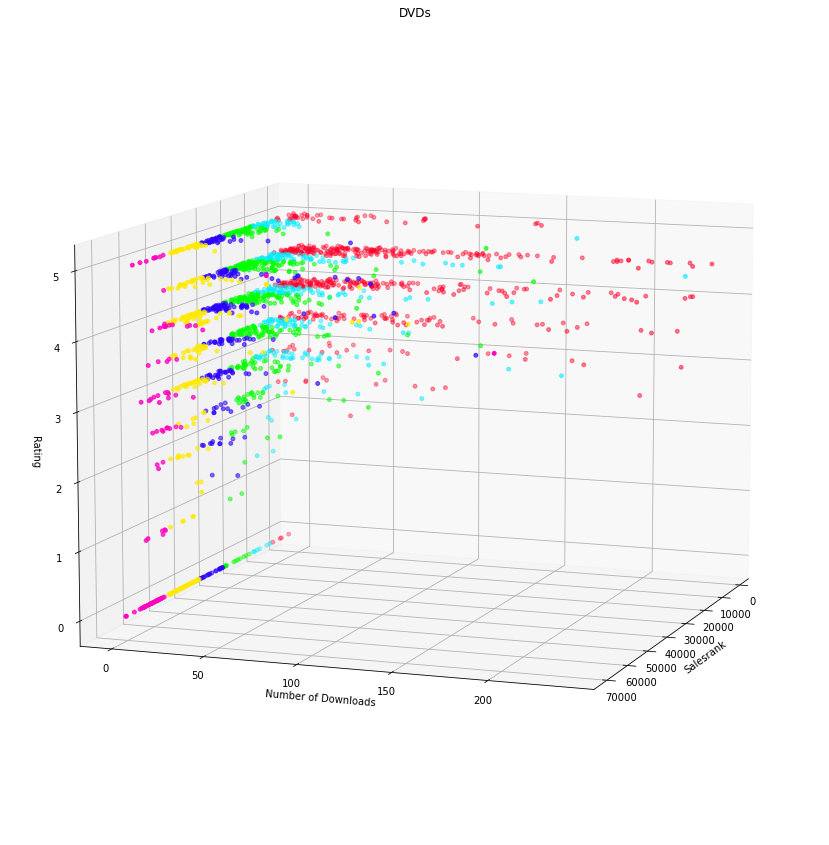

In [88]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

dvd_data = dvds[['salesrank','downloads','rating']].head(2000)
dvd_data = dvd_data[~(np.abs(dvd_data.downloads-dvd_data.downloads.mean()) > (2*dvd_data.downloads.std()))]

connectivity = kneighbors_graph(dvd_data, n_neighbors=5, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(dvd_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = dvd_data.iloc[:,0]
# Downloads
y = dvd_data.iloc[:,1]
#rating
z = dvd_data.iloc[:,2]
x = np.array(x)
y = np.array(y)
z = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=20)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("DVDs")
plt.show()

**Music: Downloads, salesrank and ratings in 3d plot using same agglomerative parameters**

Analysis Time = 0.18194031715393066 seconds


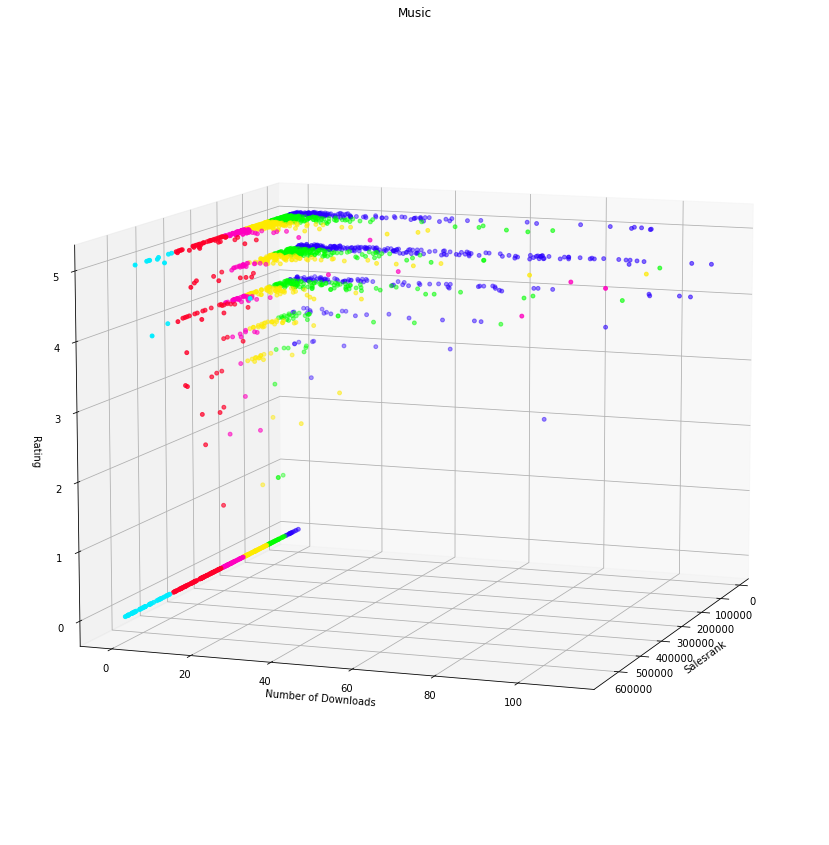

In [89]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

music_data = music[['salesrank','downloads','rating']].head(2000)
music_data = music_data[~(np.abs(music_data.downloads-music_data.downloads.mean()) > (2*music_data.downloads.std()))]

connectivity = kneighbors_graph(music_data, n_neighbors=5, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(music_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = music_data.iloc[:,0]
# Downloads
y = music_data.iloc[:,1]
#rating
z = music_data.iloc[:,2]
x = np.array(x)
y = np.array(y)
z = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=20)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("Music")
plt.show()

**Videos: Downloads, salesrank and ratings in 3d plot using same agglomerative parameters**

Analysis Time = 0.41968798637390137 seconds


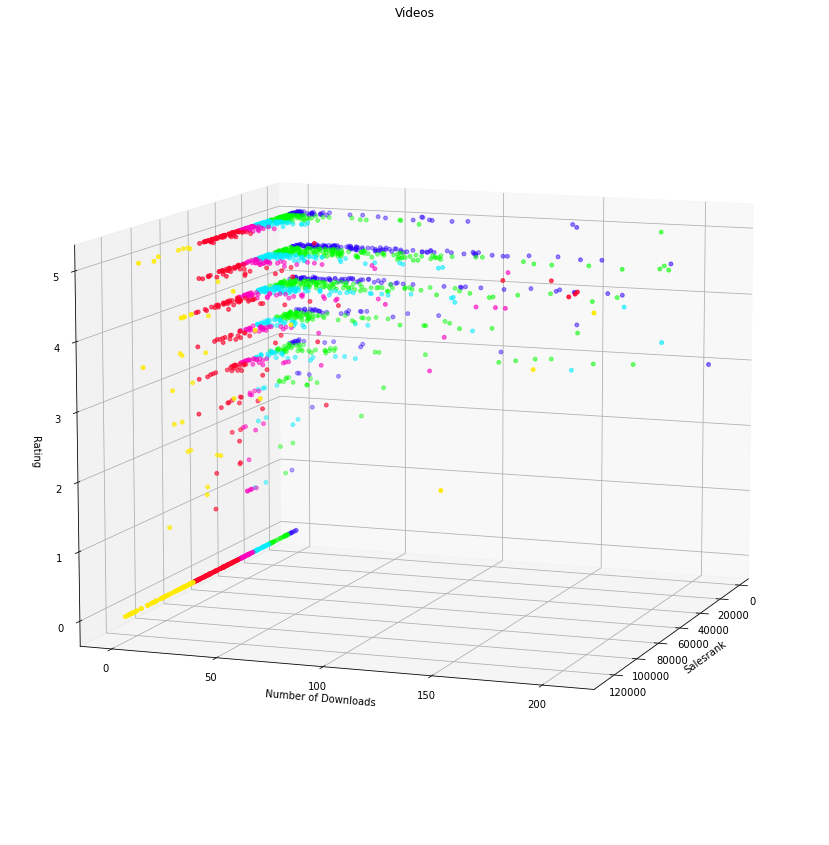

In [90]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

video_data = videos[['salesrank','downloads','rating']].head(2000)
video_data = video_data[~(np.abs(video_data.downloads-video_data.downloads.mean()) > (2*video_data.downloads.std()))]

connectivity = kneighbors_graph(video_data, n_neighbors=5, include_self=False)

start_time = time.time()
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
model.fit(video_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = video_data.iloc[:,0]
# Downloads
y = video_data.iloc[:,1]
#rating
z = video_data.iloc[:,2]
x = np.array(x)
y = np.array(y)
z = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=20)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("Videos")
plt.show()

**Books: Downloads, ratings, and salesrank using KMEANS instead and axis switch for different perspective**

Analysis Time = 0.3800528049468994 seconds


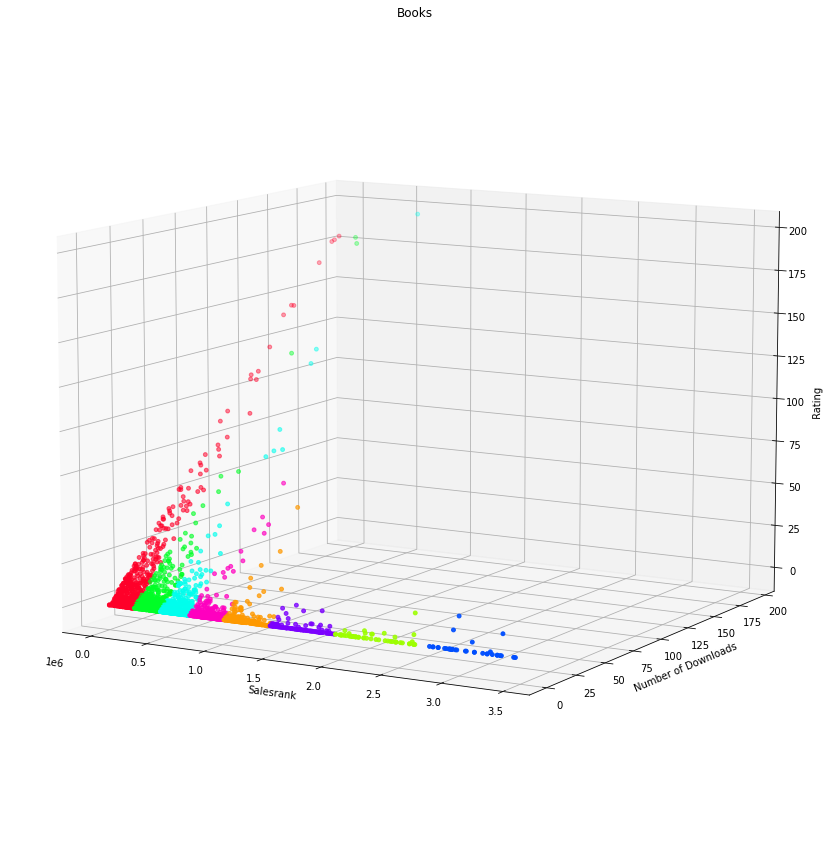

In [91]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

book_data = books[['salesrank','downloads','rating']].head(2000)

#Remove Outliers
book_data = book_data[~(np.abs(book_data.downloads-book_data.downloads.mean()) > (2*book_data.downloads.std()))]

start_time = time.time()
model = KMeans()
model.fit(book_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = book_data.iloc[:,0]
# Downloads
y = book_data.iloc[:,1]
#rating
z = book_data.iloc[:,2]
x = np.array(x)
z = np.array(y)
y = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=300)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("Books")
plt.show()

**DVDs: Downloads, ratings, and salesrank using KMEANS instead and axis switch for different perspective**

Analysis Time = 0.35396885871887207 seconds


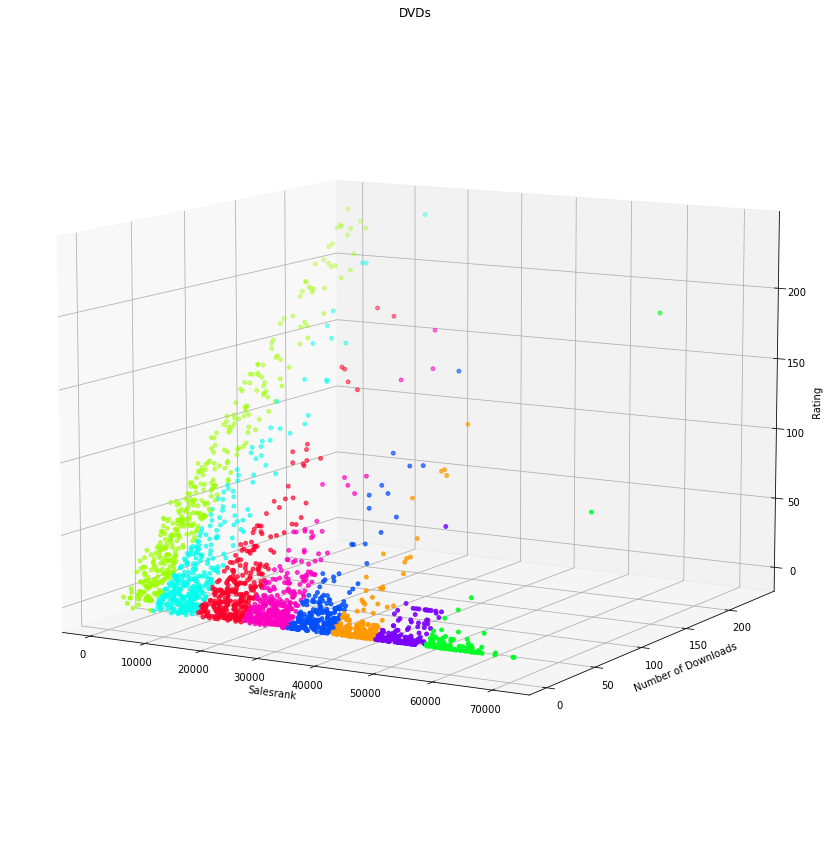

In [92]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

dvd_data = dvds[['salesrank','downloads','rating']].head(2000)

#Remove Outliers
dvd_data = dvd_data[~(np.abs(dvd_data.downloads-dvd_data.downloads.mean()) > (2*dvd_data.downloads.std()))]

start_time = time.time()
model = KMeans()
model.fit(dvd_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = dvd_data.iloc[:,0]
# Downloads
y = dvd_data.iloc[:,1]
#rating
z = dvd_data.iloc[:,2]
x = np.array(x)
z = np.array(y)
y = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=300)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("DVDs")
plt.show()

**Music: Downloads, ratings, and salesrank using KMEANS instead and axis switch for different perspective**

Analysis Time = 0.3952829837799072 seconds


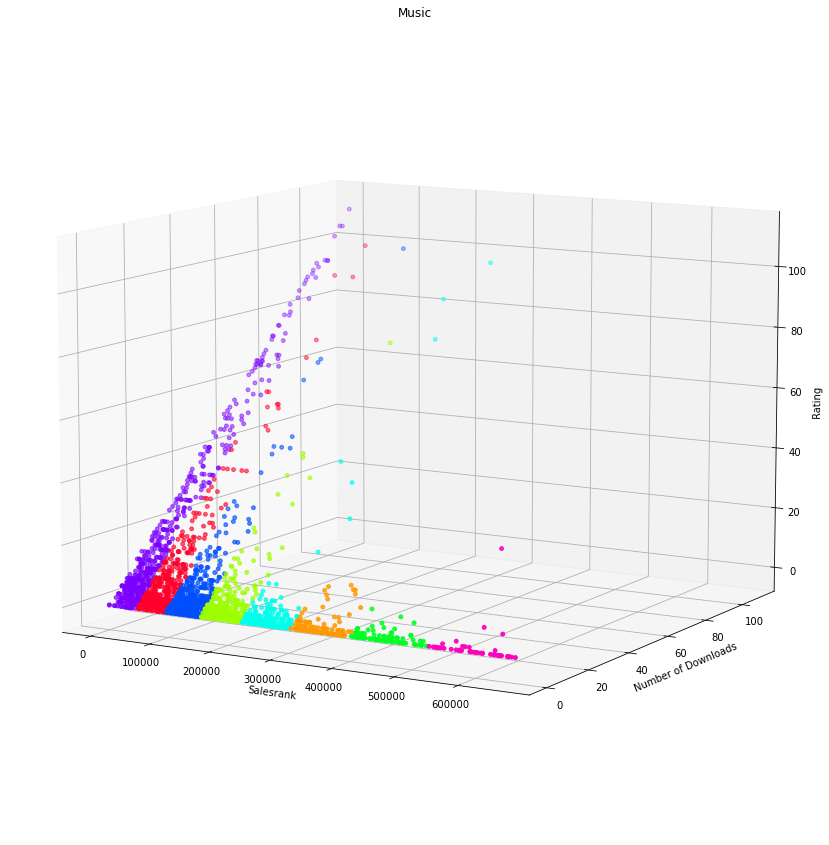

In [93]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

music_data = music[['salesrank','downloads','rating']].head(2000)

#Remove Outliers
music_data = music_data[~(np.abs(music_data.downloads-music_data.downloads.mean()) > (2*music_data.downloads.std()))]

start_time = time.time()
model = KMeans()
model.fit(music_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = music_data.iloc[:,0]
# Downloads
y = music_data.iloc[:,1]
#rating
z = music_data.iloc[:,2]
x = np.array(x)
z = np.array(y)
y = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=300)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("Music")
plt.show()

**Videos: Downloads, ratings, and salesrank using KMEANS instead and axis switch for different perspective**

Analysis Time = 0.4799530506134033 seconds


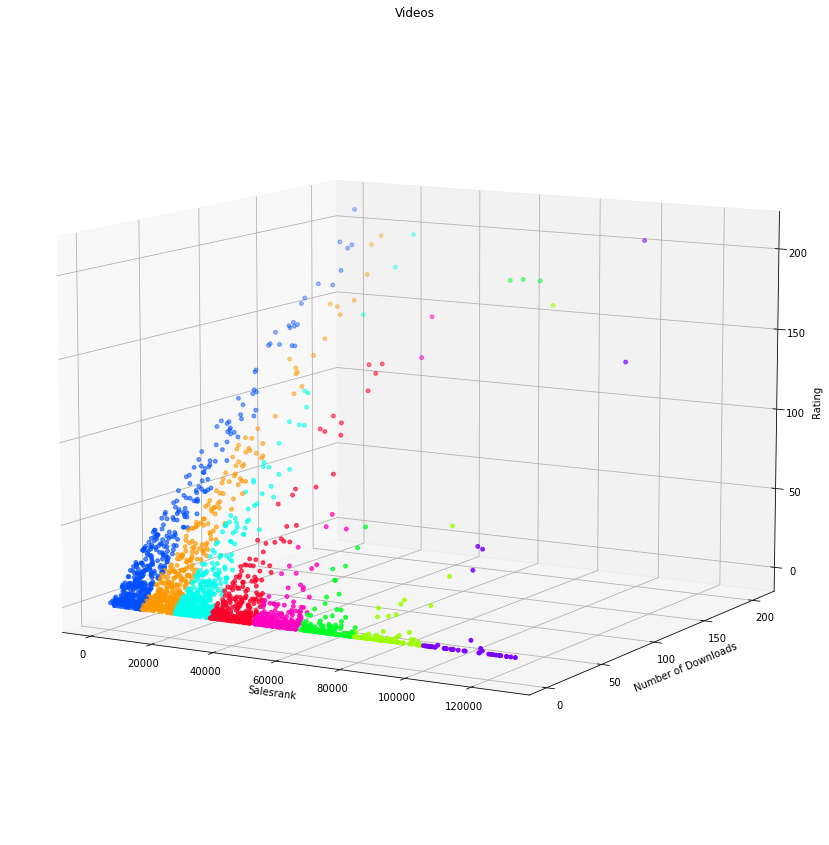

In [94]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

video_data = videos[['salesrank','downloads','rating']].head(2000)

#Remove Outliers
video_data = video_data[~(np.abs(video_data.downloads-video_data.downloads.mean()) > (2*video_data.downloads.std()))]

start_time = time.time()
model = KMeans()
model.fit(video_data)
finish_time = time.time() - start_time
print("Analysis Time =", finish_time, "seconds")

#Salesrank
x = video_data.iloc[:,0]
# Downloads
y = video_data.iloc[:,1]
#rating
z = video_data.iloc[:,2]
x = np.array(x)
z = np.array(y)
y = np.array(z)

cluster = np.array(model.labels_)

ax.set_xlabel('Salesrank')
ax.set_ylabel('Number of Downloads')
ax.set_zlabel('Rating')
ax.view_init(elev=10., azim=300)
ax.scatter(x,y,z, c=cluster, s =15, cmap = plt.cm.gist_rainbow)
plt.title("Videos")
plt.show()

**Co-purchasing analysis hopefully**

In [95]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1)
books
#X_train, X_test, y_train, y_test = train_test_split(b)

id                                              title group  \
0            1            Patterns of Preaching: A Sermon Sampler  Book   
1            2                         Candlemas: Feast of Flames  Book   
2            3   World War II Allied Fighter Planes Trading Cards  Book   
3            4  Life Application Bible Commentary: 1 and 2 Tim...  Book   
4            5    Prayers That Avail Much for Business: Executive  Book   
...        ...                                                ...   ...   
259160  262102  The Everything Homebuying Book: From Open Hous...  Book   
259162  262104                                      Satchel Paige  Book   
259163  262106  Japanese for Busy People: English Teacher's Ma...  Book   
259165  262108                               Book Of Vision Quest  Book   
259166  262109  Favorite Russian Fairy Tales (Dover Children's...  Book   

        salesrank  review_cnt  downloads  rating  
0        396585.0           2          2     5.0  
1        168596.0          12         12     4.5  
2       1270652.0           1          1     5.0  
3        631289.0           1          1     4.0  
4        455160.0           0          0     0.0  
...           ...         ...        ...     ...  
259160   664919.0           3          3     4.5  
259162    36449.0           3          3     4.5  
259163   588715.0           0          0     0.0  
259165   255390.0           4          4     4.0  
259166   250544.0           2          2     5.0  

[188013 rows x 7 columns]

Tomorrow ideally: Get number of clusters, size of clusters, etc for each of above.  Find links between co-purchasing similarities or create regressive classifier to attempt prediction, take screenshots of graphs from different angles, comment code, parameters for Kmeans clusters, maybe make the 3D clusters for all group combined